# Complaints Analysis with Python
For this project I want to try some NLP techniques and mine some information from the Portal da Queixa. I follow the [Blueprints for Text Analytics Using Python](https://www.amazon.com/Blueprints-Text-Analytics-Using-Python/dp/149207408X/) to achieve my goals. It is a excellent book about NLP.

## Import data from database

In [1]:
from sql_conn import *

df = sql_df('worten')
df

,id,data,title,comment,link,created_at
0,1,5 de janeiro 2017,Falta de informação na venda/demora na reparação,Venho por este meio mostrar o meu desagrado co...,https://portaldaqueixa.com/brands/worten/compl...,2022-01-20 08:58:52
1,2,25 de novembro 2021 |Data de ocorrência: 24 de...,"Xbox series x pago, sem previsão de entrega",Encomendei e paguei uma Xbox Series X no dia 2...,https://portaldaqueixa.com/brands/worten/compl...,2022-01-20 08:58:54
2,3,28 de dezembro 2020,Não recebi a encomenda completa,Fiz uma encomenda no dia 10/11/2020 com o núme...,https://portaldaqueixa.com/brands/worten/compl...,2022-01-20 08:58:57
3,4,23 de janeiro 2018 (editada a 5 de fevereiro ...,Novamente enganada,Depois de muitas tentativas de entrar em conta...,https://portaldaqueixa.com/brands/worten/compl...,2022-01-20 08:59:00
4,5,21 de maio 2019 (editada a 21 de maio 2019),Encomenda não entregue,"Boa noite, Venho por este meio fazer uma recla...",https://portaldaqueixa.com/brands/worten/compl...,2022-01-20 08:59:03
...,...,...,...,...,...,...
11011,11012,25 de junho 2021,"TV LG volta na mesma, com problemas de som","No dia 2 Junho, entrei em contacto com a worte...",https://portaldaqueixa.com/brands/worten/compl...,2022-01-20 16:51:51
11012,11013,11 de março 2021,Incompetência no serviço prestado,No passado dia 1 de fevereiro levei o meu port...,https://portaldaqueixa.com/brands/worten/compl...,2022-01-20 16:51:53
11013,11014,29 de agosto 2019,Preço minimo,Encontrei o telemóvel que queria numa loja em ...,https://portaldaqueixa.com/brands/worten/compl...,2022-01-20 16:51:56
11014,11015,17 de julho 2019,Reembolso,"boas tardes, venho fazer esta reclamaçao pelos...",https://portaldaqueixa.com/brands/worten/compl...,2022-01-20 16:51:58


## Data Cleaning
Some strings have the following format: "9 de agosto 2018 (editada a 13 de agosto 2018)". So I need to clean them and map the month name to a month number

In [2]:
import datetime
import re

def date_parser(date_string):
    """convert string portuguese dates to datetime"""

    mapping = {'janeiro': '01', 'fevereiro': '02', 'março': '03',
               'abril': '04', 'maio': '05', 'junho': '06',
               'julho': '07', 'agosto': '08', 'setembro': '09',
               'outubro': '10', 'novembro': '11', 'dezembro': '12', 'zembro': '12'}

    # Some dates are like this "9 de agosto 2018 (editada a 13 de agosto 2018)"
    # So I build a regex expression to remove the second part of the string
    date_info = re.sub("\(.*?\)", '', date_string)
    try:
        day, month_pt, year = date_info.lower().replace('de', '').split()
        month = mapping[month_pt]
        date_iso = '{}-{:02d}-{:02d}'.format(year, int(month), int(day))
        date_object = datetime.datetime.strptime(date_iso, '%Y-%m-%d')

        return date_object

    except:
        pass

In [3]:
df['data'] = df['data'].map(date_parser)
df = df.dropna()
df = df.reset_index()
df = df.drop(['index', 'id'], axis=1)

# Create a new column year to use it during analysis
df['data'] = pd.to_datetime(df['data'])
df['year'] = df['data'].dt.year
df['year'] = df['year'].astype(int)
df

,data,title,comment,link,created_at,year
0,2017-01-05,Falta de informação na venda/demora na reparação,Venho por este meio mostrar o meu desagrado co...,https://portaldaqueixa.com/brands/worten/compl...,2022-01-20 08:58:52,2017
1,2020-12-28,Não recebi a encomenda completa,Fiz uma encomenda no dia 10/11/2020 com o núme...,https://portaldaqueixa.com/brands/worten/compl...,2022-01-20 08:58:57,2020
2,2018-01-23,Novamente enganada,Depois de muitas tentativas de entrar em conta...,https://portaldaqueixa.com/brands/worten/compl...,2022-01-20 08:59:00,2018
3,2019-05-21,Encomenda não entregue,"Boa noite, Venho por este meio fazer uma recla...",https://portaldaqueixa.com/brands/worten/compl...,2022-01-20 08:59:03,2019
4,2021-04-22,Entrega de grande electrodoméstico - pessoal d...,Efetuei uma compra de um frigorífico numa Wort...,https://portaldaqueixa.com/brands/worten/compl...,2022-01-20 08:59:06,2021
...,...,...,...,...,...,...
9902,2021-06-25,"TV LG volta na mesma, com problemas de som","No dia 2 Junho, entrei em contacto com a worte...",https://portaldaqueixa.com/brands/worten/compl...,2022-01-20 16:51:51,2021
9903,2021-03-11,Incompetência no serviço prestado,No passado dia 1 de fevereiro levei o meu port...,https://portaldaqueixa.com/brands/worten/compl...,2022-01-20 16:51:53,2021
9904,2019-08-29,Preço minimo,Encontrei o telemóvel que queria numa loja em ...,https://portaldaqueixa.com/brands/worten/compl...,2022-01-20 16:51:56,2019
9905,2019-07-17,Reembolso,"boas tardes, venho fazer esta reclamaçao pelos...",https://portaldaqueixa.com/brands/worten/compl...,2022-01-20 16:51:58,2019


## EDA

In [4]:
df['length'] = df['comment'].str.len()
df['length'].describe().T

count     9907.000000
mean      1334.848390
std       1140.177875
min         46.000000
25%        612.000000
50%       1020.000000
75%       1698.000000
max      14975.000000
Name: length, dtype: float64

<AxesSubplot:>

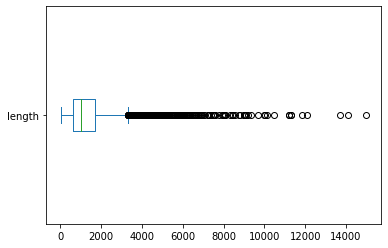

In [5]:
df['length'].plot(kind='box', vert=False)

<AxesSubplot:ylabel='Frequency'>

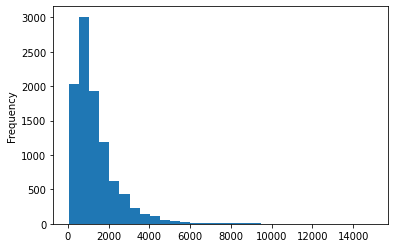

In [6]:
df['length'].plot(kind='hist', bins=30)

<AxesSubplot:title={'center':'AVG complaint length'}, xlabel='year'>

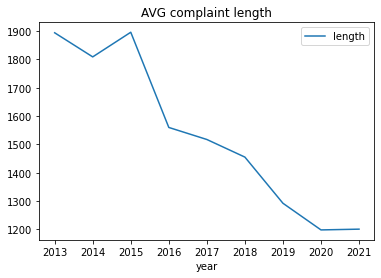

In [7]:
df.groupby('year').agg({'length': 'mean'}).plot(title='AVG complaint length')

## NLP

In [8]:
import nltk

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joaom\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### TF-IDF Vectorizer
TF-IDF is a great way to quickly gain insights from your text. For this project I will only analyse the comment column.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_text = TfidfVectorizer(use_idf=True, min_df=1, max_df=1.0,
                             stop_words=stopwords, ngram_range=(1, 1))
# Fit and transform to our data
# vectors_text is going to be used later in the NMF algorithm
vectors_text = tfidf_text.fit_transform(df['comment'])
vectors_text #39910 tokens

<9907x39910 sparse matrix of type '<class 'numpy.float64'>'
	with 921662 stored elements in Compressed Sparse Row format>

In [10]:
vectors_text.todense()[:2]

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.07235229]])

In [11]:
# Create a pandas df to store the tokens and the corresponding TFIDF value
# we transpose the vectors_text to store each value in a row
# index the tokens with get_feature_names() method
tfidf = pd.DataFrame(vectors_text[0].T.todense(), index=tfidf_text.get_feature_names(), columns=["TF-IDF"])
# Sort from the more important to least important
tfidf = tfidf.sort_values('TF-IDF', ascending=False)
tfidf

E:\scrapper-portaldaqueixa\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,TF-IDF
seguradora,0.289426
equipamento,0.251606
consumidores,0.218976
inicio,0.198309
domingos,0.173225
...,...
costura,0.000000
cota,0.000000
cotada,0.000000
cotação,0.000000


### NMF - Topic finder
I found NMF very efficient and gives great results. LDA was another great option, but a bit slower due to stochastic sampling.

In [12]:
from sklearn.decomposition import NMF

n_components=5

nmf_text_model = NMF(n_components=n_components, random_state=42)
w_text_matrix = nmf_text_model.fit_transform(vectors_text)
w_text_matrix # rows are documents, columns are topics

E:\scrapper-portaldaqueixa\venv\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


array([[0.        , 0.08572699, 0.        , 0.03005877, 0.        ],
       [0.02548091, 0.        , 0.        , 0.0310679 , 0.00444979],
       [0.        , 0.03790708, 0.00315733, 0.07303785, 0.        ],
       ...,
       [0.00658825, 0.        , 0.        , 0.06383431, 0.00375519],
       [0.04434539, 0.0063381 , 0.        , 0.03531227, 0.        ],
       [0.04808063, 0.        , 0.        , 0.00068153, 0.        ]])

In [13]:
# to calculate the size from each topic to see if there is any outlier
w_text_matrix.sum(axis=0)/w_text_matrix.sum()*100.0

array([25.16441546, 23.40112434, 12.14134536, 31.09467652,  8.19843832])

In [14]:
nmf_text_model.components_ # rows are topics, columns represent the token

array([[0.05494649, 0.00187241, 0.00116061, ..., 0.00136325, 0.26717504,
        0.0418949 ],
       [0.01701436, 0.00175655, 0.        , ..., 0.        , 0.        ,
        0.00761752],
       [0.02664346, 0.00178333, 0.00038228, ..., 0.00164345, 0.        ,
        0.01745525],
       [0.0735536 , 0.00419584, 0.00220921, ..., 0.00148326, 0.        ,
        0.        ],
       [0.0010299 , 0.        , 0.        , ..., 0.00044451, 0.        ,
        0.        ]])

In [15]:
dicts = {}
new_list = []

for topic, word_vector in enumerate(nmf_text_model.components_):
    largest = word_vector.argsort()[::-1]
    dicts["Tópico " + str(topic+1)] = new_list

    for i in range(0, 5):
        new_list.append(tfidf_text.get_feature_names()[largest[i]])
        if i == 4:
            new_list = []

df_topicos = pd.DataFrame.from_dict(dicts)
df_topicos

E:\scrapper-portaldaqueixa\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Tópico 1,Tópico 2,Tópico 3,Tópico 4,Tópico 5
0,encomenda,equipamento,máquina,worten,jogo
1,dia,telemóvel,lavar,loja,pré
2,entrega,reparação,roupa,nao,lançamento
3,worten,garantia,técnico,produto,reserva
4,dias,dia,dia,tv,jogos


In [16]:
topics = ['delivers',
          'warranty',
          'washing machine',
          'store',
          'games'
          ]

### Dimensionality Reduction with TSNE
I wanted to be able to see the topics in a graphic. And it would be great to see the evolution over the years.

In [17]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=42)
tsne_embedding = tsne.fit_transform(w_text_matrix)
tsne_embedding = pd.DataFrame(tsne_embedding, columns=['x', 'y'])
tsne_embedding['hue'] = w_text_matrix.argmax(axis=1)
tsne_embedding

E:\scrapper-portaldaqueixa\venv\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
E:\scrapper-portaldaqueixa\venv\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,x,y,hue
0,62.949558,-49.660725,1
1,-24.172514,7.890245,3
2,-9.933450,-73.126289,3
3,-40.611801,25.108046,0
4,-32.892532,7.390492,3
...,...,...,...
9902,16.312895,-21.391541,1
9903,23.530884,-56.789005,1
9904,-57.427002,-33.242889,3
9905,-28.268486,31.649931,0


### Plot the results
The next cell is a little bit hacky. Since I want to create a custom legend afterwards I first plot a dummy output and then obtain the rgb-values used in this plot. Afterwards I have a hard-coded color list I can use for the custom legend. I honestly didn't find a better way.

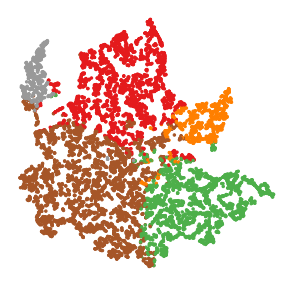

[array([0.89411765, 0.10196078, 0.10980392, 1.        ]),
 array([0.30196078, 0.68627451, 0.29019608, 1.        ]),
 array([1.        , 0.49803922, 0.        , 1.        ]),
 array([0.65098039, 0.3372549 , 0.15686275, 1.        ]),
 array([0.6, 0.6, 0.6, 1. ])]

In [18]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

colormap = 'Set1'

fig, axs = plt.subplots(1,1, figsize=(5, 5))

legend_list = []

data = tsne_embedding
scatter = plt.scatter(data=data,x='x',y='y',s=6,c=data['hue'],cmap=colormap)
plt.axis('off')
plt.show()

colors = []
for i in range(len(topics)):
   idx = np.where(data['hue']==i)[0][0]
   color = scatter.get_facecolors()[idx]
   colors.append(color)
   legend_list.append(mpatches.Ellipse((0, 0), 1, 1, fc=color))

colors

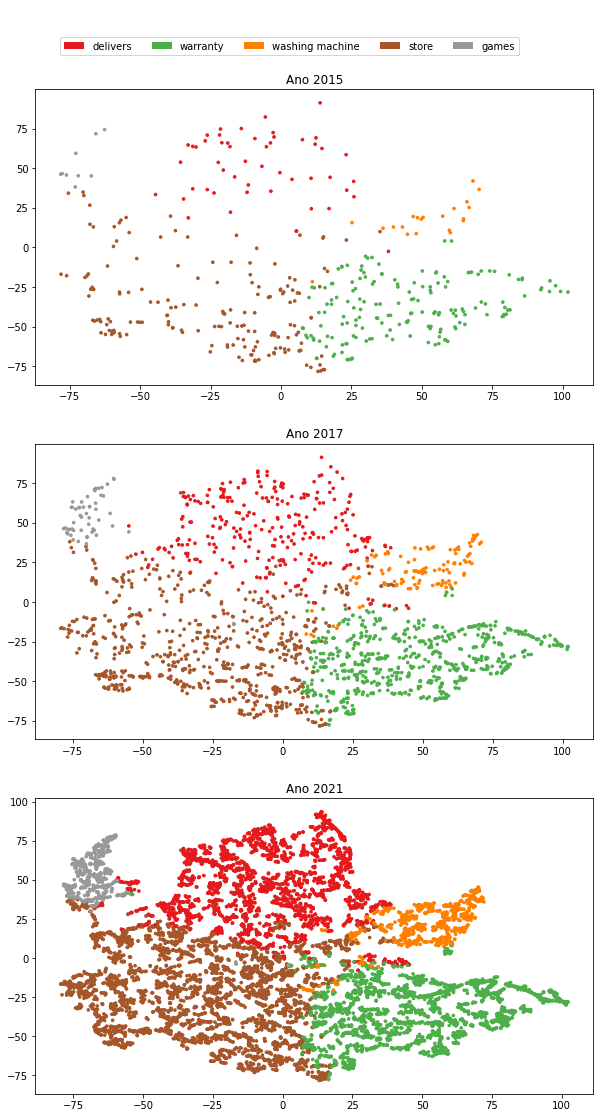

In [19]:
years = [2015, 2017, 2021]

fig, ax = plt.subplots(3,1,figsize=(10,18))

for count, year in enumerate(years):
    data = tsne_embedding.loc[df['year'] <= year]
    ax[count].set_title(f'Ano {year}')
    ax[count].scatter(data['x'], data['y'], s=7, c=data['hue'], cmap=colormap)

fig.legend(legend_list,topics,loc=(0.1,0.95),ncol=5)
plt.subplots_adjust(top=0.9)
plt.show()